# 2020-11-18: Hi-C analysis 2

In [2]:
# Import public packages.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import ndimage as ndi 
from importlib import reload
import pickle
import czifile
import skimage as ski

# Import my packages.
import sys
sys.path.append('/Users/michaelstadler/Bioinformatics/Projects/hic/bin')
import hic_jupyter as hc
sys.path.append('/Users/michaelstadler/Bioinformatics/Projects/rpb1/bin')
import imagep as im

In [2]:
panels42 = hc.load_panels('/Users/michaelstadler/Bioinformatics/Projects/hic/viewerfiles/hic-42')

In [4]:
panels50 = hc.load_panels('/Users/michaelstadler/Bioinformatics/Projects/hic/viewerfiles/hic-50')
panels51 = hc.load_panels('/Users/michaelstadler/Bioinformatics/Projects/hic/viewerfiles/hic-51')
panels52 = hc.load_panels('/Users/michaelstadler/Bioinformatics/Projects/hic/viewerfiles/hic-52')

In [42]:
reload(hc)
hc.plot_aggregate_features_compare(panels50, panels51, gff)

NameError: name 'panels50' is not defined

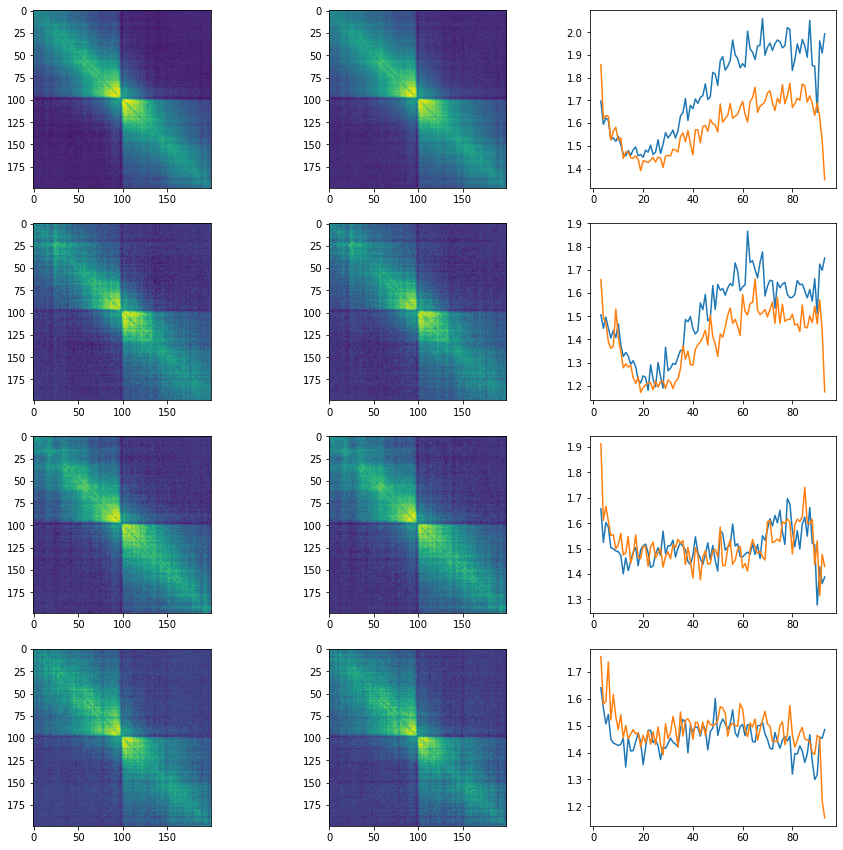

In [44]:
hc.plot_aggregate_features_compare(panels50, panels52, gff)

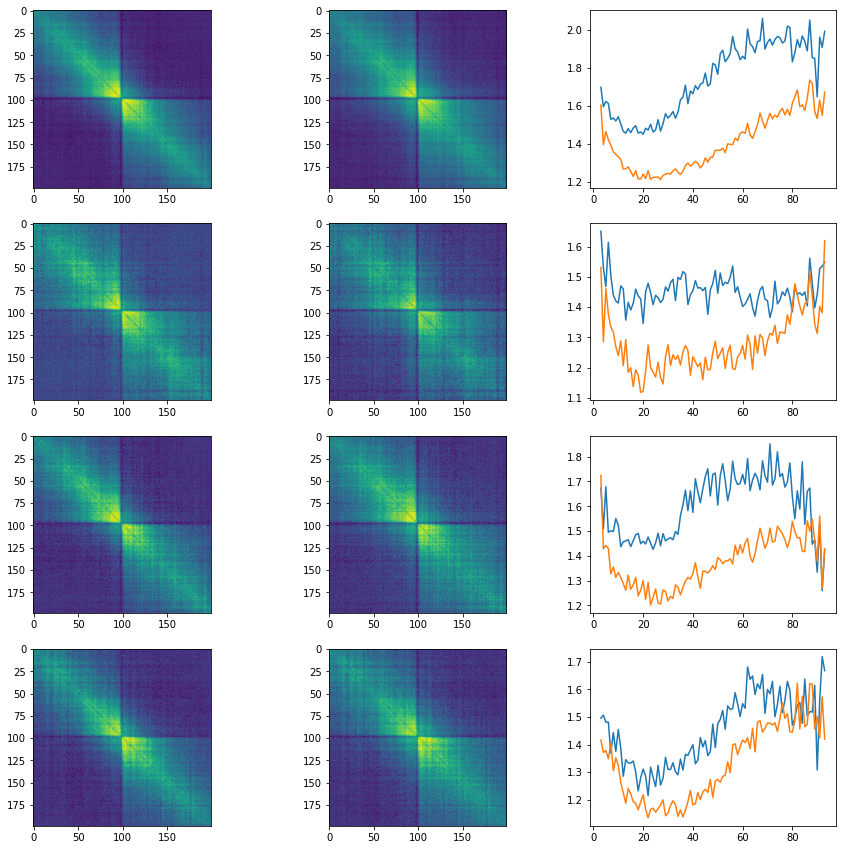

In [45]:
gff = hc.load_gff3('/Users/michaelstadler/Bioinformatics/Projects/hic/data/genomic_data/topboundaries-CP-CT-BE-relsig-BEAF-32.txt')
hc.plot_aggregate_features_compare(panels50, panels51, gff)

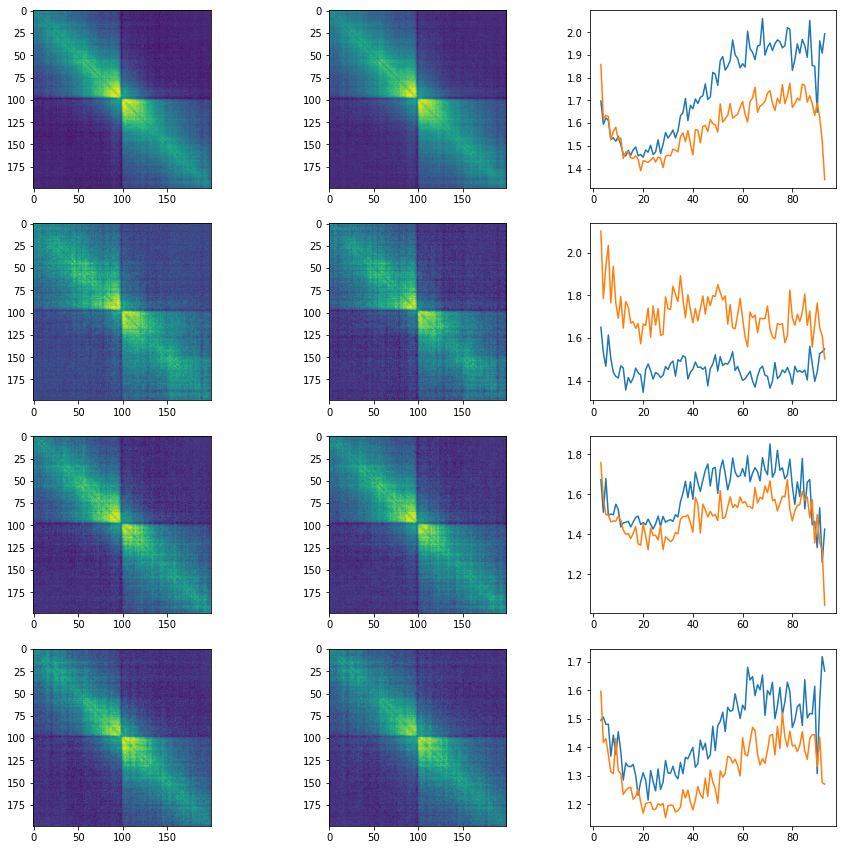

In [46]:
hc.plot_aggregate_features_compare(panels50, panels52, gff)

In [3]:
panels66 = hc.load_panels('/Users/michaelstadler/Bioinformatics/Projects/hic/viewerfiles/hic-66-68')
panels67 = hc.load_panels('/Users/michaelstadler/Bioinformatics/Projects/hic/viewerfiles/hic-67-69')

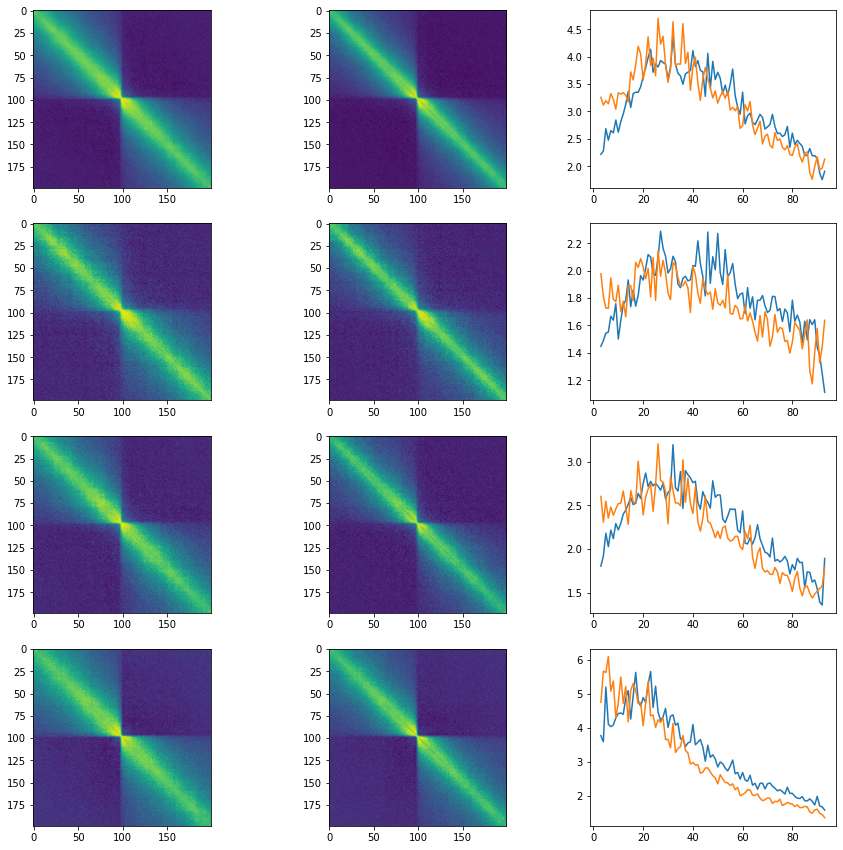

In [6]:
gff = hc.load_gff3('/Users/michaelstadler/Bioinformatics/Projects/hic/data/genomic_data/CP190:Developmental-Stage=Embryos-0-12-hr:ChIP-chip:Rep-1::Dmel_r5.32:modENCODE_22_dm6.gff3')
hc.plot_aggregate_features_compare(panels66, panels67, gff)

In [40]:
reload(hc)
feature_file = '/Users/michaelstadler/Bioinformatics/Projects/hic/data/genomic_data/CP190:Developmental-Stage=Embryos-0-12-hr:ChIP-chip:Rep-1::Dmel_r5.32:modENCODE_22_dm6.gff3'
signal_files = ['/Users/michaelstadler/Bioinformatics/Projects/hic/viewerfiles/viewer_tracks/CP190_0_12h.txt',
               '/Users/michaelstadler/Bioinformatics/Projects/hic/viewerfiles/viewer_tracks/GAF_0-12-hr.txt']
outfolder = '/Users/michaelstadler/Bioinformatics/Projects/hic/data/genomic_data'
outputname='CP190sites-CP-GA-relsig-'
names=['CP190','GAF']
feature_cols = [0,3]
hc.features_assign_chip_scores(feature_file, signal_files, outfolder=outfolder, outputname=outputname, names=names, feature_file_cols=feature_cols)

3L	[274809.2904578 245169.6166415]
X	[258679.3860806 237403.4924648]
M	[63.4301496 59.9495017]
4	[15434.3730906 13681.7387583]
2R	[245296.7466355 205217.3327037]
2L	[252021.2458334 215172.3465141]
3R	[318134.553136  269836.2433759]


['2L' '2R' '3L' '3R' 'X']
['2L' '2R' '3L' '3R' 'X']
['2L' '2R' '3L' '3R' 'X']
['2L' '2R' '3L' '3R' 'X']
['2L' '2R' '3L' '3R' 'X']
['2L' '2R' '3L' '3R' 'X']
['2L' '2R' '3L' '3R' 'X']
['2L' '2R' '3L' '3R' 'X']


/Users/michaelstadler/Bioinformatics/Projects/hic/bin/hic_jupyter.py:793: RuntimeWarning: Mean of empty slice.
  scores.append(non_insulated.mean() / insulated.mean())
/Users/michaelstadler/opt/anaconda3/envs/im/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


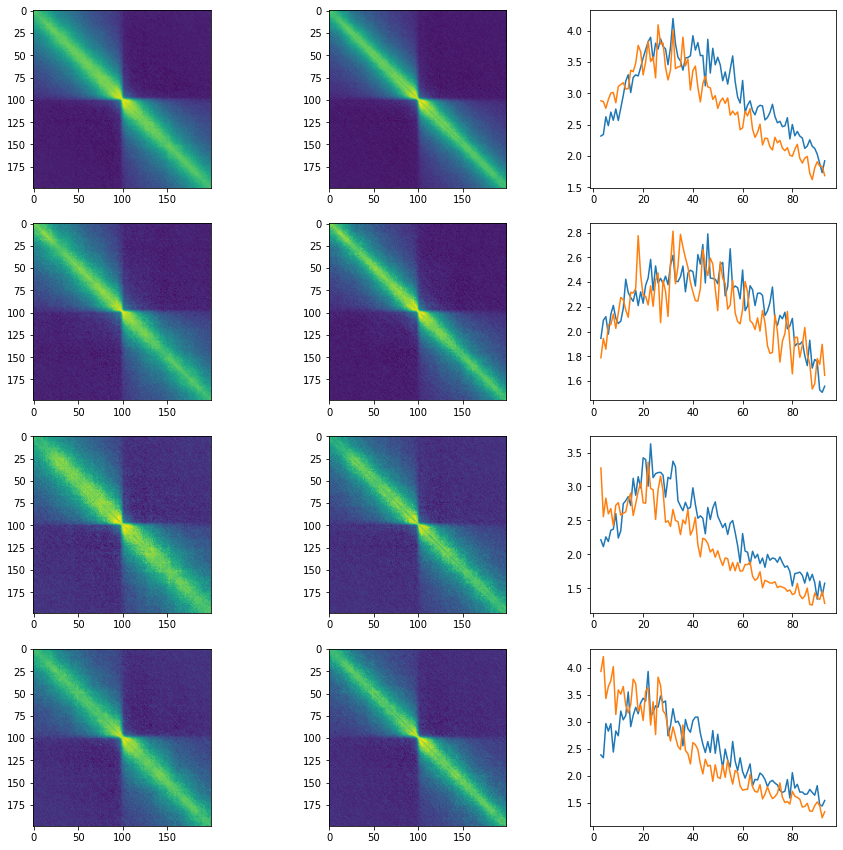

In [41]:
reload(hc)
gff = hc.load_gff3('/Users/michaelstadler/Bioinformatics/Projects/hic/data/genomic_data/CP190sites-CP-GA-relsig-GAF.txt')
#gff = hc.load_gff3('/Users/michaelstadler/Bioinformatics/Projects/hic/data/genomic_data/topboundaries-nonorm-CP190.txt')
hc.plot_aggregate_features_compare(panels66, panels67, gff)

In [27]:
t1, t2 = np.percentile(list(gff.iloc[:,2]), (33,66))

In [31]:
gff

0            1          2
0      2L        16000        NaN
1      2L        17500        NaN
2      2L        18500        NaN
3      2L        18500        NaN
4      2L        19500        NaN
...    ..          ...        ...
10358   X   2.2824e+07  0.0772707
10359   X   2.2825e+07  0.0618829
10360   X   2.2914e+07   0.133432
10361   X  2.30075e+07  0.0802766
10362   X  2.30125e+07  0.0911186

[10363 rows x 3 columns]

In [39]:
?np.sum

In [55]:
def plot_aggregate_features_compare2(panels1, panels2, gff, rad=99, binsize=500):
    """Plot aggregate Hi-C signal and insulation score for a genomic feature set
    in two Hi-C datasets
    
    Plots the aggregate (sum/mean) Hi-C score around a set of features supplied
    in a gff file as well as the insulation-distance plot for the aggregate data.
    Uses the score feature of the gff to split the features into thirds and plots 
    the same for these splits. The top row is for the entire set, row 2-4 are for 
    thirds with successively higher scores. Aggregate plots for panels1 is plotted 
    in col 0, panels2 in col 1, and insulation-distance plots are overlaid in 
    col 2. Data for panels1 is in blue, for panels2 in orange.
    
    Args:
        panels1, panels2: dict of dict of ndarray
            Hi-C data panels. Keys are chromosome, then bin1 (left-most), value
            is 2d numpy ndarray with hi-c data.
        gff: pandas DF
            gff object produced by load_gff. Each row is gff entry, col 0: 
            chromosome, 1: mean position, 2: score
        rad: int
            The 'radius' of the window for the aggregate score. Length of
            matrix will be 2*rad + 1.
        binsize: int
            The bin size, in bp, of the data to use (500, 1000, 2000, 4000)
    
    Returns: None
    """
    t1, t2 = np.percentile(list(gff.iloc[:,2]), (33,66))
    gff_1 = gff[gff.iloc[:,2] <= t1]
    gff_2 = gff[(gff.iloc[:,2] > t1) & (gff.iloc[:,2] < t2)]
    gff_3 = gff[gff.iloc[:,2] >= t2]

    sig1_norm_all = hc.aggregate_signal_gff_landmarks_norm(panels1, gff, rad, binsize)
    sig1_norm_1 = hc.aggregate_signal_gff_landmarks_norm(panels1, gff_1, rad, binsize)
    sig1_norm_2 = hc.aggregate_signal_gff_landmarks_norm(panels1, gff_2, rad, binsize)
    sig1_norm_3 = hc.aggregate_signal_gff_landmarks_norm(panels1, gff_3, rad, binsize)
    sig2_norm_all = hc.aggregate_signal_gff_landmarks_norm(panels2, gff, rad, binsize)
    sig2_norm_1 = hc.aggregate_signal_gff_landmarks_norm(panels2, gff_1, rad, binsize)
    sig2_norm_2 = hc.aggregate_signal_gff_landmarks_norm(panels2, gff_2, rad, binsize)
    sig2_norm_3 = hc.aggregate_signal_gff_landmarks_norm(panels2, gff_3, rad, binsize)
    
    fig, ax = plt.subplots(3,4, figsize=(15,15))
    img = ax[0][0].imshow(sig1_norm_all)
    img.set_extent([-100,100, -100, 100])


    ax[0][1].imshow(sig1_norm_1)
    ax[0][2].imshow(sig1_norm_2)
    ax[0][3].imshow(sig1_norm_3)
    ax[1][0].imshow(sig2_norm_all)
    ax[1][1].imshow(sig2_norm_1)
    ax[1][2].imshow(sig2_norm_2)
    ax[1][3].imshow(sig2_norm_3)
    ax[2][0].plot(hc.insulation_cum_dist(sig1_norm_all)[0])
    ax[2][0].plot(hc.insulation_cum_dist(sig2_norm_all)[0])
    ax[2][1].plot(hc.insulation_cum_dist(sig1_norm_1)[0])
    ax[2][1].plot(hc.insulation_cum_dist(sig2_norm_1)[0])
    ax[2][2].plot(hc.insulation_cum_dist(sig1_norm_2)[0])
    ax[2][2].plot(hc.insulation_cum_dist(sig2_norm_2)[0])
    ax[2][3].plot(hc.insulation_cum_dist(sig1_norm_3)[0])
    ax[2][3].plot(hc.insulation_cum_dist(sig2_norm_3)[0])

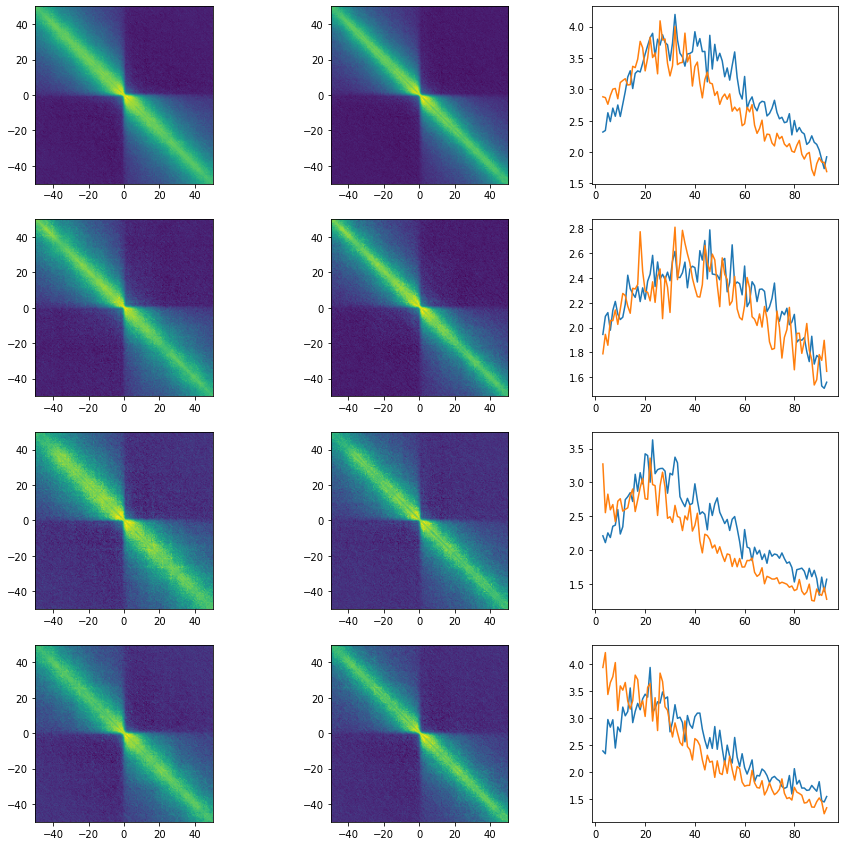

In [58]:
reload(hc)
hc.plot_aggregate_features_compare(panels66, panels67, gff)

In [59]:
panels56 = hc.load_panels('/Users/michaelstadler/Bioinformatics/Projects/hic/viewerfiles/hic-56')
panels57 = hc.load_panels('/Users/michaelstadler/Bioinformatics/Projects/hic/viewerfiles/hic-57')
panels58 = hc.load_panels('/Users/michaelstadler/Bioinformatics/Projects/hic/viewerfiles/hic-58')
panels59 = hc.load_panels('/Users/michaelstadler/Bioinformatics/Projects/hic/viewerfiles/hic-59')



In [60]:
reload(hc)
feature_file = '/Users/michaelstadler/Bioinformatics/Projects/hic/data/genomic_data/CP190:Developmental-Stage=Embryos-0-12-hr:ChIP-chip:Rep-1::Dmel_r5.32:modENCODE_22_dm6.gff3'
signal_files = ['/Users/michaelstadler/Bioinformatics/Projects/hic/viewerfiles/viewer_tracks/CP190_0_12h.txt',
               '/Users/michaelstadler/Bioinformatics/Projects/hic/viewerfiles/viewer_tracks/dCTCF_0_12h.txt',
               '/Users/michaelstadler/Bioinformatics/Projects/hic/viewerfiles/viewer_tracks/BEAF-32_0_12h.txt']
outfolder = '/Users/michaelstadler/Bioinformatics/Projects/hic/data/genomic_data'
outputname='CP190sites-CP-CT-BE-relsig-'
names=['CP190','CTCF','BEAF32']
feature_cols = [0,3]
hc.features_assign_chip_scores(feature_file, signal_files, outfolder=outfolder, outputname=outputname, names=names, feature_file_cols=feature_cols)

/Users/michaelstadler/Bioinformatics/Projects/hic/bin/hic_jupyter.py:793: RuntimeWarning: Mean of empty slice.
  scores.append(non_insulated.mean() / insulated.mean())
/Users/michaelstadler/opt/anaconda3/envs/im/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/michaelstadler/Bioinformatics/Projects/hic/bin/hic_jupyter.py:793: RuntimeWarning: Mean of empty slice.
  scores.append(non_insulated.mean() / insulated.mean())
/Users/michaelstadler/opt/anaconda3/envs/im/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/michaelstadler/Bioinformatics/Projects/hic/bin/hic_jupyter.py:793: RuntimeWarning: Mean of empty slice.
  scores.append(non_insulated.mean() / insulated.mean())
/Users/michaelstadler/opt/anaconda3/envs/im/lib/python3.8/site-packages/numpy/core/_methods.py:161: Ru

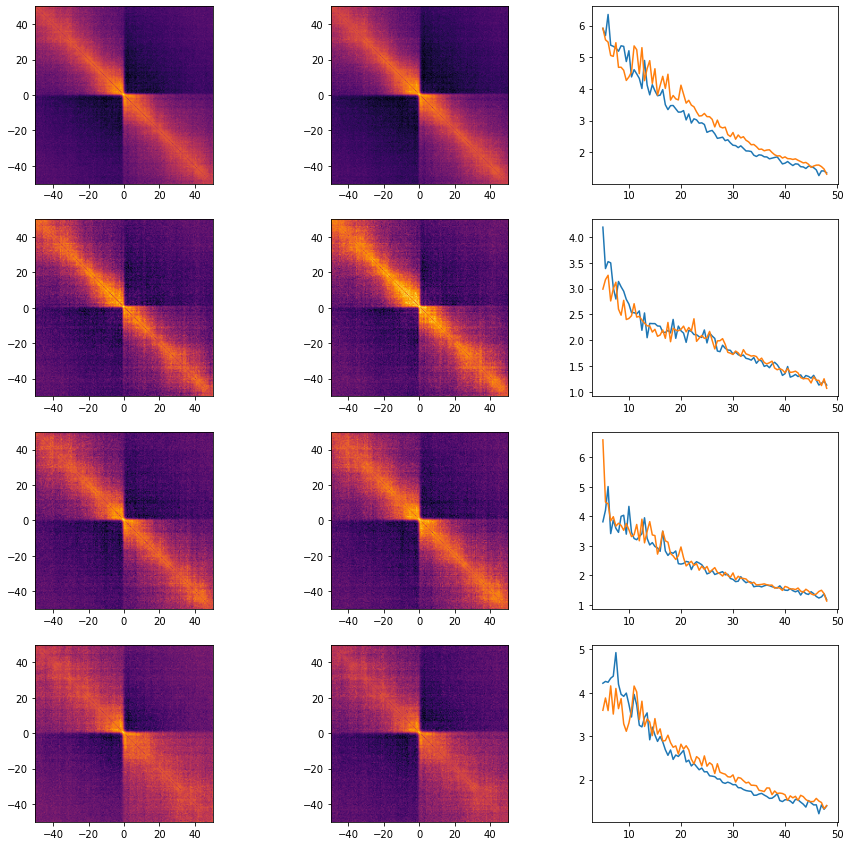

In [88]:
reload(hc)
gff = hc.load_gff3('/Users/michaelstadler/Bioinformatics/Projects/hic/data/genomic_data/topboundaries-nonorm-CTCF.txt')
hc.plot_aggregate_features_compare(panels57, panels56, gff, rad=99)

/Users/michaelstadler/Bioinformatics/Projects/hic/bin/hic_jupyter.py:793: RuntimeWarning: Mean of empty slice.
  scores.append(non_insulated.mean() / insulated.mean())
/Users/michaelstadler/opt/anaconda3/envs/im/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/michaelstadler/Bioinformatics/Projects/hic/bin/hic_jupyter.py:793: RuntimeWarning: Mean of empty slice.
  scores.append(non_insulated.mean() / insulated.mean())
/Users/michaelstadler/opt/anaconda3/envs/im/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/michaelstadler/Bioinformatics/Projects/hic/bin/hic_jupyter.py:793: RuntimeWarning: Mean of empty slice.
  scores.append(non_insulated.mean() / insulated.mean())
/Users/michaelstadler/opt/anaconda3/envs/im/lib/python3.8/site-packages/numpy/core/_methods.py:161: Ru

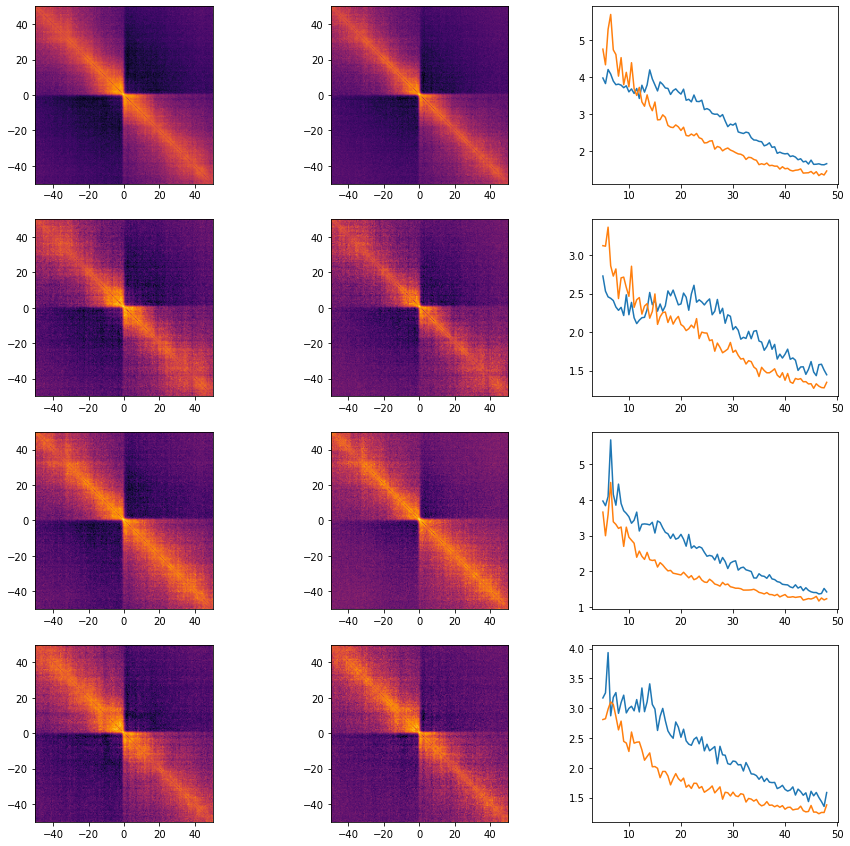

In [87]:
reload(hc)
gff = hc.load_gff3('/Users/michaelstadler/Bioinformatics/Projects/hic/data/genomic_data/topboundaries-CP-CT-BE-relsig-CP190.txt')
hc.plot_aggregate_features_compare(panels59, panels58, gff)

In [73]:
def temp3(panels1, panels2, gff, rad=20, binsize=500):
    t1, t2 = np.percentile(list(gff.iloc[:,2]), (33,66))
    gff_1 = gff[gff.iloc[:,2] <= t1]
    gff_2 = gff[(gff.iloc[:,2] > t1) & (gff.iloc[:,2] < t2)]
    gff_3 = gff[gff.iloc[:,2] >= t2]

    sig1_norm_all = hc.aggregate_signal_gff_landmarks_norm(panels1, gff, rad, binsize)
    sig1_norm_1 = hc.aggregate_signal_gff_landmarks_norm(panels1, gff_1, rad, binsize)
    sig1_norm_2 = hc.aggregate_signal_gff_landmarks_norm(panels1, gff_2, rad, binsize)
    sig1_norm_3 = hc.aggregate_signal_gff_landmarks_norm(panels1, gff_3, rad, binsize)
    sig2_norm_all = hc.aggregate_signal_gff_landmarks_norm(panels2, gff, rad, binsize)
    sig2_norm_1 = hc.aggregate_signal_gff_landmarks_norm(panels2, gff_1, rad, binsize)
    sig2_norm_2 = hc.aggregate_signal_gff_landmarks_norm(panels2, gff_2, rad, binsize)
    sig2_norm_3 = hc.aggregate_signal_gff_landmarks_norm(panels2, gff_3, rad, binsize)
    
    fig, ax = plt.subplots(4,3, figsize=(15,15))
    ax[0][0].imshow(sig1_norm_all)
    ax[1][0].imshow(sig1_norm_1)
    ax[2][0].imshow(sig1_norm_2)
    ax[3][0].imshow(sig1_norm_3)
    ax[0][1].imshow(sig2_norm_all)
    ax[1][1].imshow(sig2_norm_1)
    ax[2][1].imshow(sig2_norm_2)
    ax[3][1].imshow(sig2_norm_3)
    ax[0][2].plot(hc.insulation_cum_dist(sig1_norm_all)[0])
    ax[0][2].plot(hc.insulation_cum_dist(sig2_norm_all)[0])
    ax[1][2].plot(hc.insulation_cum_dist(sig1_norm_1)[0])
    ax[1][2].plot(hc.insulation_cum_dist(sig2_norm_1)[0])
    ax[2][2].plot(hc.insulation_cum_dist(sig1_norm_2)[0])
    ax[2][2].plot(hc.insulation_cum_dist(sig2_norm_2)[0])
    ax[3][2].plot(hc.insulation_cum_dist(sig1_norm_3)[0])
    ax[3][2].plot(hc.insulation_cum_dist(sig2_norm_3)[0])
    #ax[2][1].plot(insulation_score(signal_norm_2))
    #ax[3][1].plot(insulation_score(signal_norm_3))

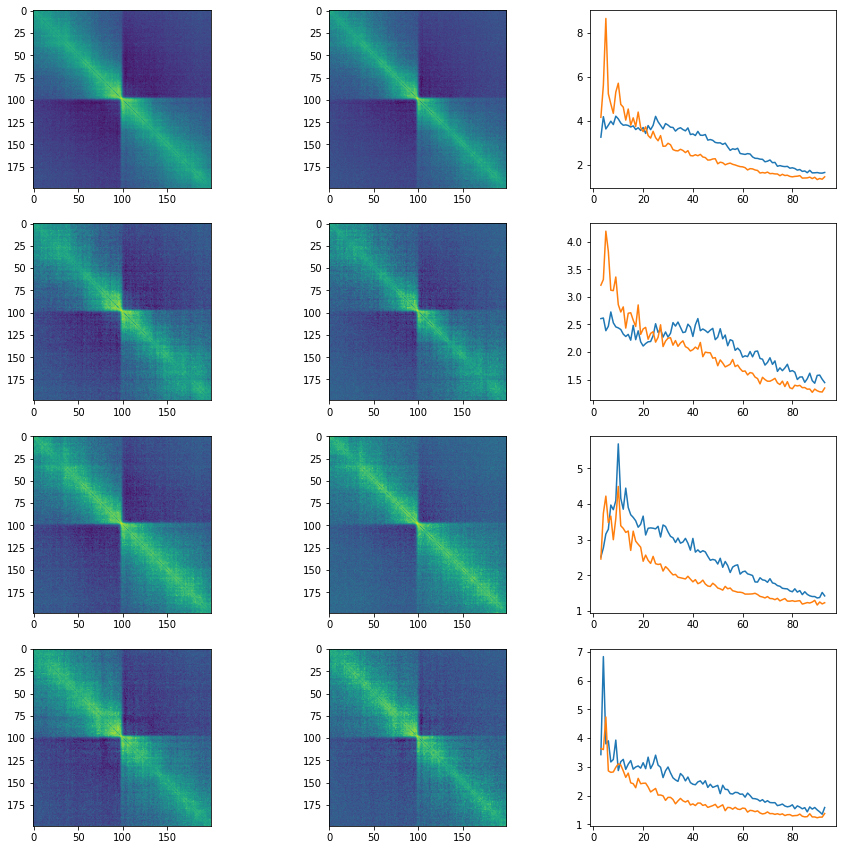

In [74]:
reload(hc)
gff = hc.load_gff3('/Users/michaelstadler/Bioinformatics/Projects/hic/data/genomic_data/topboundaries-CP-CT-BE-relsig-CP190.txt')
temp3(panels59, panels58, gff, rad=99)

/Users/michaelstadler/Bioinformatics/Projects/hic/bin/hic_jupyter.py:793: RuntimeWarning: Mean of empty slice.
  scores.append(non_insulated.mean() / insulated.mean())
/Users/michaelstadler/opt/anaconda3/envs/im/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/michaelstadler/Bioinformatics/Projects/hic/bin/hic_jupyter.py:793: RuntimeWarning: Mean of empty slice.
  scores.append(non_insulated.mean() / insulated.mean())
/Users/michaelstadler/opt/anaconda3/envs/im/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/michaelstadler/Bioinformatics/Projects/hic/bin/hic_jupyter.py:793: RuntimeWarning: Mean of empty slice.
  scores.append(non_insulated.mean() / insulated.mean())
/Users/michaelstadler/opt/anaconda3/envs/im/lib/python3.8/site-packages/numpy/core/_methods.py:161: Ru

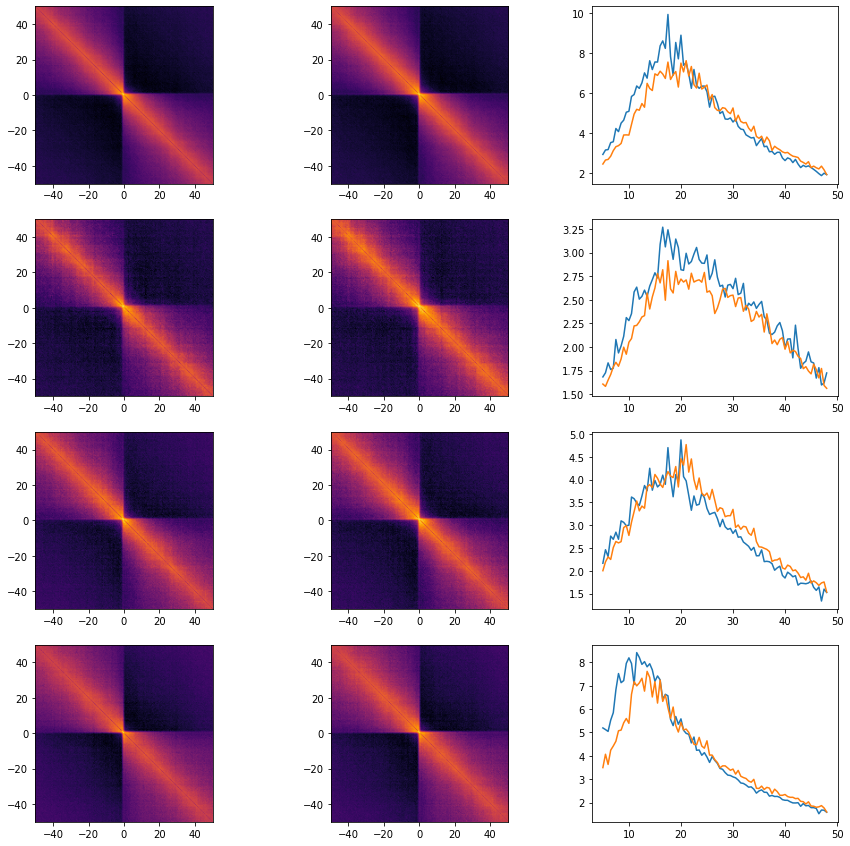

In [89]:
gff = hc.load_gff3('/Users/michaelstadler/Bioinformatics/Projects/hic/data/genomic_data/CP190:Developmental-Stage=Embryos-0-12-hr:ChIP-chip:Rep-1::Dmel_r5.32:modENCODE_22_dm6.gff3')
hc.plot_aggregate_features_compare(panels57, panels56, gff, rad=99)